# DS 644-003 - Predicting Airbnb Prices in New York City: Machine Learning Approach


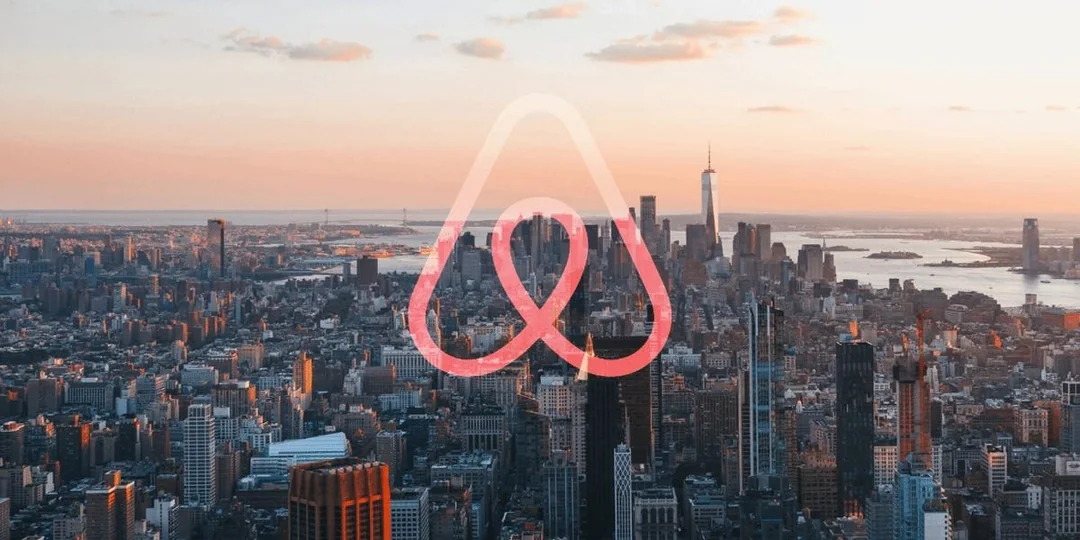

**Project Overview:**
>
  Airbnb has revolutionized the hospitality industry, offering diverse accommodations worldwide. Understanding the factors influencing Airbnb pricing is essential for hosts aiming to optimize their listings and for analysts studying market dynamics. This project explores the NYC Airbnb dataset to predict listing prices using advanced machine learning models.
>
  In this project, we are aiming to see if there are certain features that contribute to price more than others. We also want to see if we can find outliers for the Airbnbs data. We hope that this exploration can be useful for travelers looking to find a place in New York City, or for homeowners to be able to price their property at a competitive price to make a profit. At the end of this project we will build the ML model to predict airbnb prices.
>
  For dataset, we will use 2019 New York City Airbnb data, published by dgomonov on Kaggle (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data). This data includes information about the hosts, geographical data, and other potential predictors of price.



----------------

**Dataset:**
>
The analysis deals with the following airbnb dataset:
  1. id: Unique ID of the Airbnb listing.
  2. name: Name of the listed property.
  3. host_id: Unique ID of the host.
  4. host_name: Name of the host.
  5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
  6. neighbourhood: Specific neighborhood where the property is located.
  7. latitude: Latitude coordinate of the property.
  8. longitude: Longitude coordinate of the property.
  9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
  10. price: Price per night (in USD).
  11. minimum_nights: Minimum number of nights guests are required to stay.
  12. number_of_reviews: Number of reviews the listing has received.
  13. last_review: Date of the last review.
  14. reviews_per_month: Average number of reviews per month.
  15. calculated_host_listings_count: Total number of properties listed by the host.
  16. availability_365: Number of days the property is available in a year.

**Libraries Used:**
>
To implement the project, the following libraries are utilized:

- Numpy - for linear algebra
- Pandas - for manipulating and preprocessing the data
- Scikit-Learn - for machine learning preprocessing, modeling (Random forest and Linear Regression), and evaluation metrics
- Torch - for training MLP model
- Seaborn - making pretty plots (uses matplotlib)!
- Plotly - creating the map of New York City
- Matplotlib - more pretty plots (also necessary for seaborn)!
- StatsModels - generating stats summary for our models
- SHAP: For model interpretation

----------------

# 0. Setup Environment

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip install torch
!pip install shap

---------

**Loading Dataset:**
>
The dataset is loaded, and for Initial Inspection: We print sample few rows of the dataset are displayed to get a quick overview of the data.

---------

In [102]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, Dataset
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sn
import matplotlib.pyplot as plt
import joblib as j
import plotly.express as px
import plotly.io as pio
import shap

from scipy.stats import norm
from scipy import stats
import random

In [4]:
# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [5]:
df = pd.read_csv("AB_NYC_2019.csv")

# 1. Exploratory Data Analysis


---------

### 1.1 Displaying the data
>

---------

In [6]:
df.sample(10)

id                                               name    host_id  \
879      317905                Come and go as  you please in BKLN!    1631733   
44383  34205267            Spacious, sunny room in Queens/Brooklyn     913940   
15394  12342297     Private bedroom in high-ceiling 4BR apartment!   19953913   
43230  33527778   Sonder | Stock Exchange | Stunning 3BR + Kitchen  219517861   
16332  13136376                    Spacious 2 Bedroom with Balcony   16110448   
5966    4365276                    Entire 2BR APT (not a railroad)    3081990   
29838  22968206  1br in spacious 2 br in the heart of Williamsburg   22748648   
41764  32472023                          comfortable Place to live  209376540   
11118   8609130                            Great Nolita Apartment!    2520559   
31800  24806106       “Studio” ideally located  across Golf Course  132669029   

          host_name neighbourhood_group       neighbourhood  latitude  \
879            Jane            Brooklyn          Kensington  40.64354   
44383     Giancarlo              Queens           Ridgewood  40.70666   
15394     Alejandro           Manhattan      Hell's Kitchen  40.76116   
43230  Sonder (NYC)           Manhattan  Financial District  40.70763   
16332        Gingie           Manhattan         East Harlem  40.79658   
5966         Amanda            Brooklyn        Williamsburg  40.70698   
29838          Hugo            Brooklyn        Williamsburg  40.71246   
41764          Jing              Queens       College Point  40.76813   
11118      Victoria           Manhattan                SoHo  40.72214   
31800         Edwin               Bronx         Throgs Neck  40.81437   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
879    -73.97777  Entire home/apt     89               3                 62   
44383  -73.90779     Private room     30              21                  0   
15394  -73.99016     Private room    120               2                 17   
43230  -74.01050  Entire home/apt    470               2                  5   
16332  -73.93287  Entire home/apt    199               2                 30   
5966   -73.95406  Entire home/apt    170               1                141   
29838  -73.96133     Private room     90               5                  1   
41764  -73.84542  Entire home/apt     60              30                  0   
11118  -73.99793  Entire home/apt    150               2                 89   
31800  -73.82774  Entire home/apt     74               2                 37   

      last_review  reviews_per_month  calculated_host_listings_count  \
879      1/2/2019               0.71                               1   
44383         NaN                NaN                               1   
15394   4/28/2017               0.43                               1   
43230    6/2/2019               1.88                             327   
16332    6/3/2019               0.80                               1   
5966    6/22/2019               3.05                               1   
29838   2/21/2018               0.06                               1   
41764         NaN                NaN                               1   
11118    6/2/2019               1.94                               1   
31800   6/13/2019               2.63                               4   

       availability_365  
879                 189  
44383                73  
15394                 0  
43230               272  
16332                30  
5966                 28  
29838                 0  
41764               121  
11118                55  
31800                70

---------

### 1.2 Retrieving data information
>

---------

In [7]:
print("df info:")
df.info()

print("")
print("df shape:")
df.shape

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review            

(48895, 16)

---------

### 1.3 Summarizing statistics
>

---------

In [8]:
# Summary statistics
print("")
print("df describe:")
print(df.describe())


df describe:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000 

In [9]:
# Check for missing values in the DataFrame
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [10]:
print("Neighbourhood Group:", df['neighbourhood_group'].unique().tolist())
print("Neighbourhood:", df['neighbourhood'].unique().tolist())
print("Room Types:", df['room_type'].unique().tolist())

Neighbourhood Group: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Neighbourhood: ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope', 'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side', 'Prospect Heights', 'Washington Heights', 'Woodside', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George', 'Highbridge', 'Financial District', 'Ridgewood', 'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo', 'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island', 'Greenwich Village', 'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
95%        355.000000
max      10000.000000
Name: price, dtype: float64


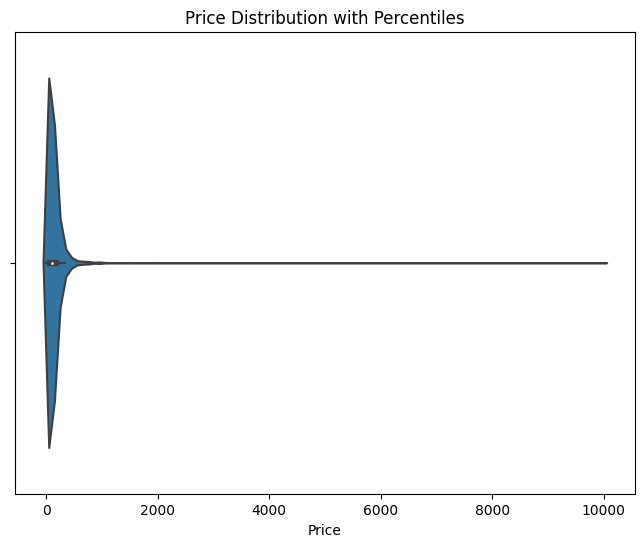

In [11]:
print(df['price'].describe(percentiles=[.25, .50, .75, .95]))

# Violin plot to show price distribution
plt.figure(figsize=(8, 6))
sn.violinplot(data=df, x='price')
plt.title("Price Distribution with Percentiles")
plt.xlabel("Price")
plt.show()



We find that there are some very large outliers for price (Top 5% percentile).

The violin plot highlights a highly skewed price distribution, with most values concentrated at lower price ranges and a long tail extending towards very high prices. This indicates that there are a few outliers with extremely high prices that significantly skew the distribution.

In [12]:
# Remove extreme values for better visualization
q1 = df["price"].quantile(0.25)  # First quartile (25th percentile)
q3 = df["price"].quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile range

# Define lower and upper bounds for non-outlier data
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter data to exclude outliers
filtered_data = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

# filtered_data = df[(df["price"] <= 1000)]


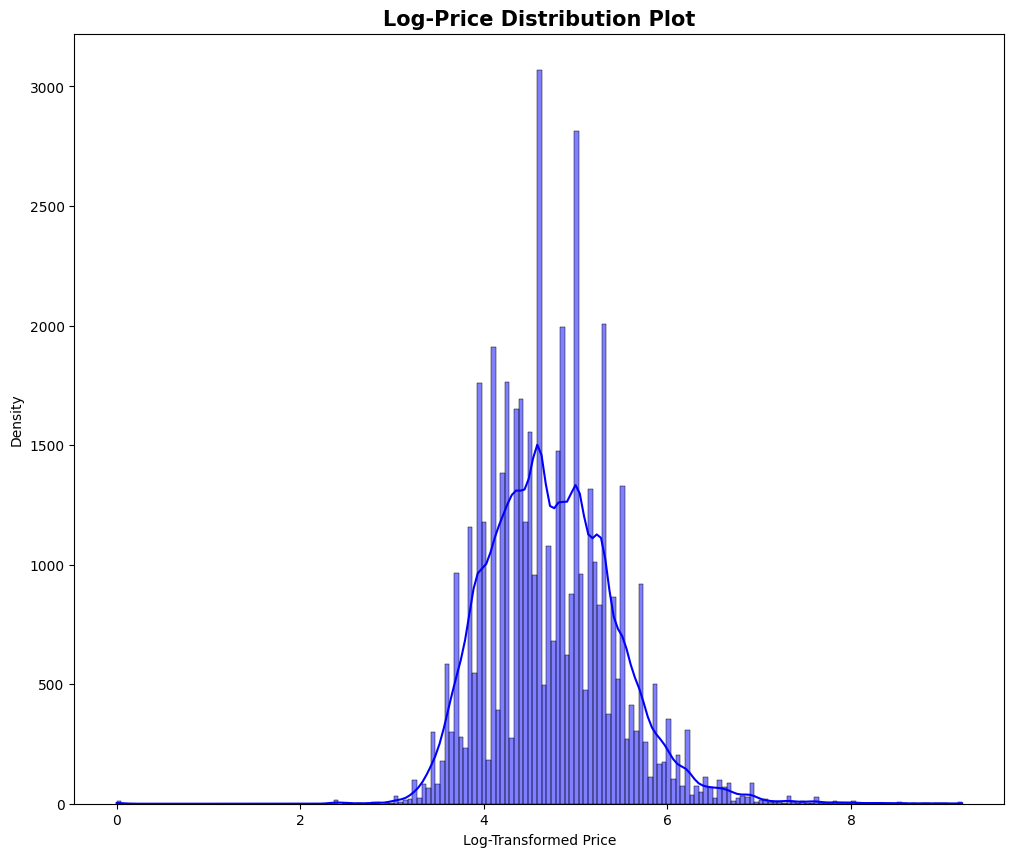

In [13]:
# plt.figure(figsize=(12,10))
# sn.distplot(np.log1p(df['price']), fit=norm)
# plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Plot log-transformed price distribution using histplot
plt.figure(figsize=(12, 10))
sn.histplot(np.log1p(df['price']), kde=True, color='blue')
plt.title("Log-Price Distribution Plot", size=15, weight='bold')
plt.xlabel("Log-Transformed Price")
plt.ylabel("Density")
plt.show()

This log-transformed price distribution plot illustrates that the prices, after applying a logarithmic transformation, follow a roughly normal distribution.

---------

### 1.4 Examining the distribution of prices across various features
>

---------

---------

##### 1.4.1 Distribution by Neighbourhood Group

---------

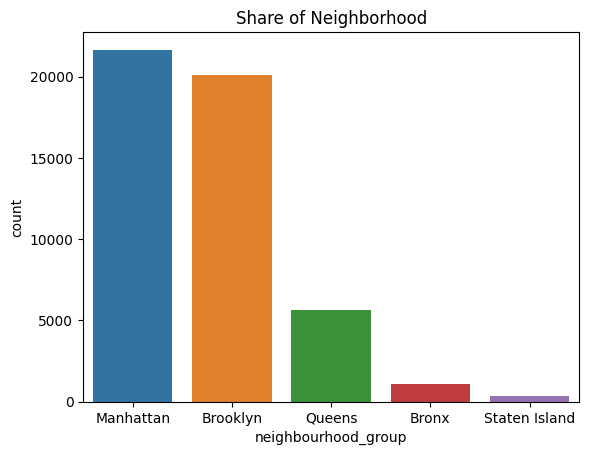

In [14]:
# using countplot to visualize the number of Airbnbs in each borough
ax = sn.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
ax.set_title('Share of Neighborhood')
plt.show()



The bar plot shows the distribution of Airbnb listings across different neighborhood groups. 

- Manhattan and Brooklyn dominate with the highest number of listings, reflecting their popularity and density of accommodations. 
- Queens has a moderate number of listings, while Bronx and Staten Island have significantly fewer listings, likely due to their less central locations and lower tourist demand. 
- This distribution highlights the concentration of Airbnb activity in Manhattan and Brooklyn compared to the other groups.

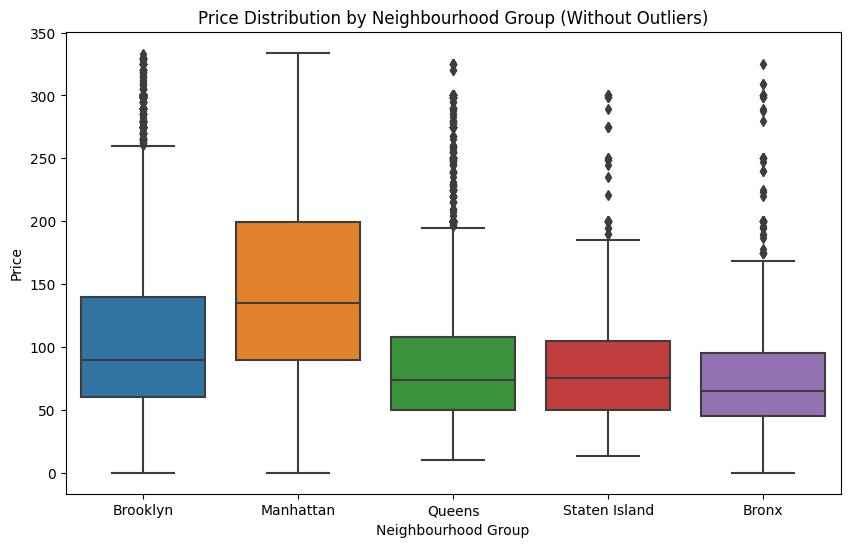

In [15]:
plt.figure(figsize=(10, 6))
sn.boxplot(x="neighbourhood_group", y="price", data=filtered_data)
plt.title("Price Distribution by Neighbourhood Group (Without Outliers)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

- The boxplot reveals that Manhattan has the highest median price and widest price variation, likely due to its centrality and premium property offerings. 
- Brooklyn follows with moderately high prices and variability, while Queens, Bronx, and Staten Island show lower and more consistent price distributions. 
- Outliers exist in all groups, particularly in Manhattan and Brooklyn, indicating some exceptionally high-priced listings. 
- This suggests diverse pricing strategies, with Manhattan and Brooklyn accommodating both luxury and mid-tier markets, while the other groups cater more to budget-conscious travelers.

---------
##### 1.4.2 Distribution by Room Types
---------

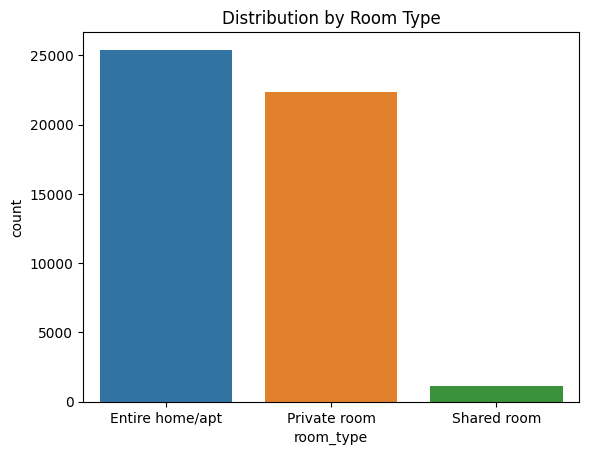

In [16]:
# using countplot to visualize the number of Airbnbs in each borough
ax = sn.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
ax.set_title('Distribution by Room Type')
plt.show()

- The bar plot indicates that the majority of Airbnb listings are for entire homes/apartments and private rooms, with entire homes/apartments slightly outnumbering private rooms. 
- Shared rooms make up a very small fraction of the listings, reflecting their lower popularity among hosts and guests. 
- This distribution suggests a strong preference for more private accommodations among Airbnb users.

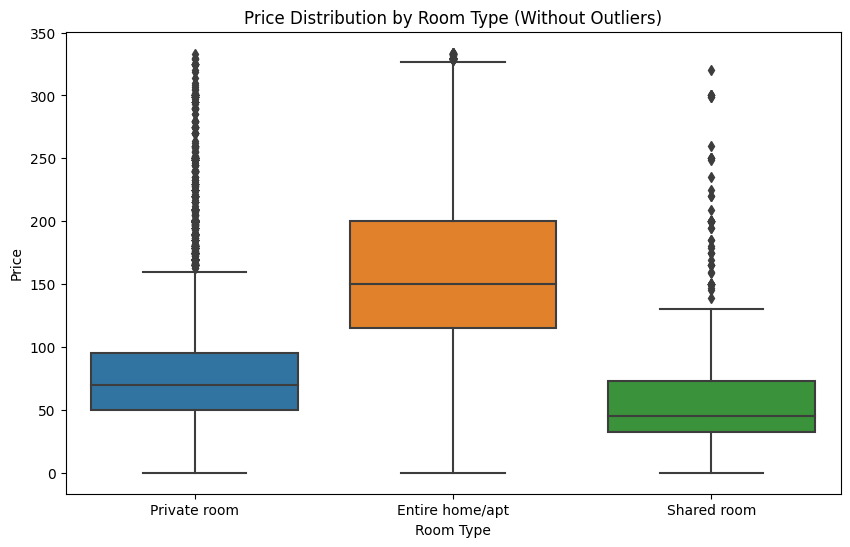

In [17]:
plt.figure(figsize=(10, 6))
sn.boxplot(x="room_type", y="price", data=filtered_data)
plt.title("Price Distribution by Room Type (Without Outliers)")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

- The boxplot shows that entire homes/apartments have the highest median prices, followed by private rooms and shared rooms. 
- Entire homes also exhibit the largest variability in prices, suggesting a wider range of offerings from budget to luxury properties. 
- Private rooms show moderate variability and lower median prices, while shared rooms have the lowest prices and smallest range, reflecting their budget-oriented nature. 
- This distribution highlights distinct pricing patterns based on room type preferences and property features.

---------
##### 1.4.3 Distribution of Price across different neighborhood groups categorized by room types
---------

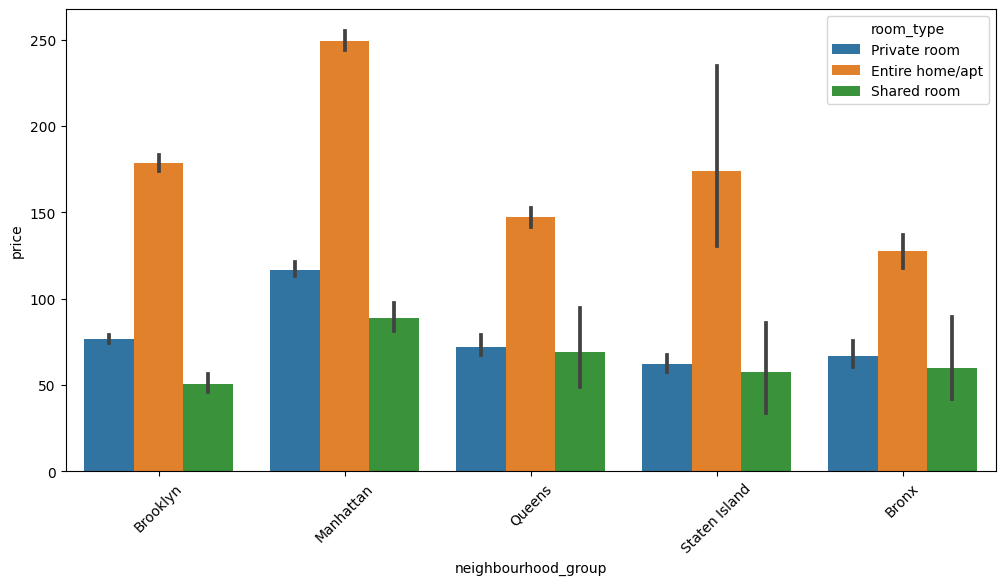

In [18]:
plt.figure(figsize=(12,6))
sn.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

This bar plot shows the average Airbnb price across different neighborhood groups categorized by room types. 
- Entire home/apartment consistently has the highest average price in all neighborhood groups, particularly in Manhattan, where prices are significantly higher. 
- Private rooms are moderately priced, while shared rooms are the least expensive. 
- This distribution highlights that both neighborhood and room type play a crucial role in determining Airbnb prices, with Manhattan and entire homes being associated with premium pricing.

---------
##### 1.4.4 Top 10 and Bottom 10 Neighbourhoods by Average Price
---------

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


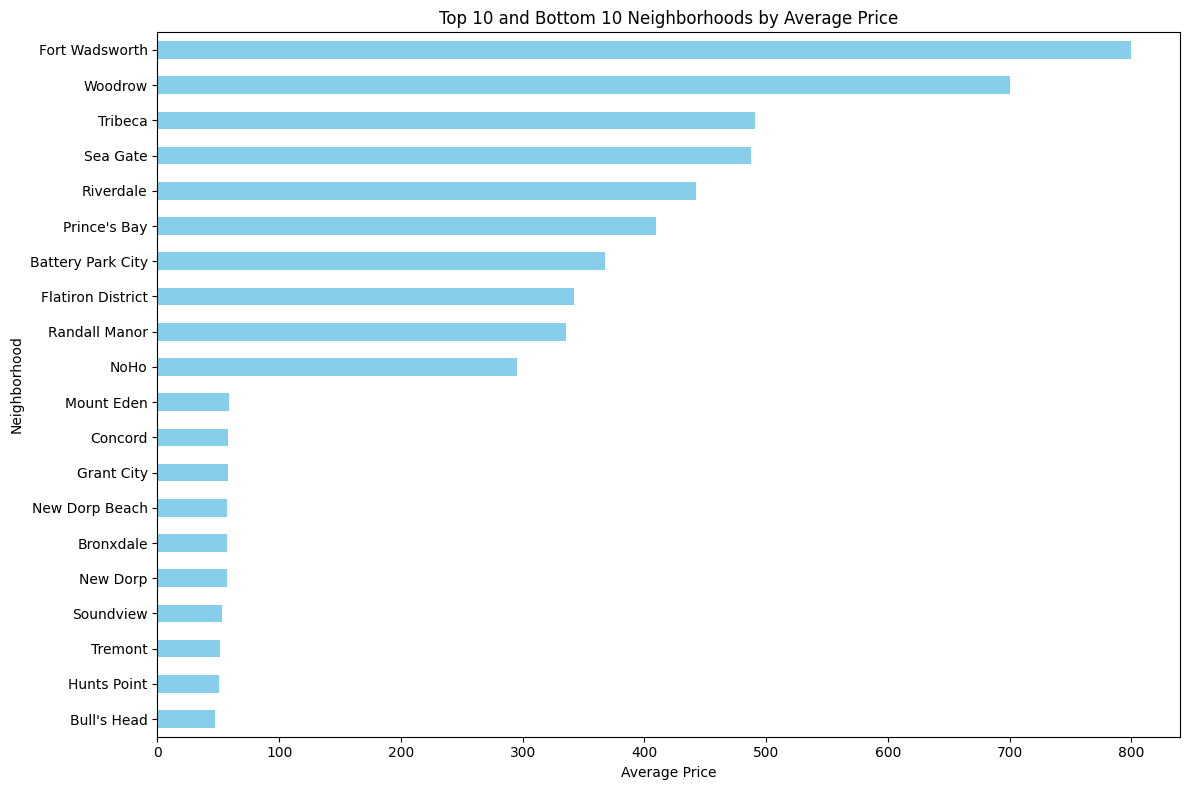

In [19]:
# Average price by neighborhood
avg_price_neighborhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
print(avg_price_neighborhood)

# Bar plot for 10 highest and 10 lowest average prices by neighborhood
plt.figure(figsize=(12, 8))
highest_avg_price = avg_price_neighborhood.head(10)
lowest_avg_price = avg_price_neighborhood.tail(10)

# Concatenate highest and lowest for visualization
combined_avg_price = pd.concat([highest_avg_price, lowest_avg_price]).sort_values(ascending=True)
combined_avg_price.plot(kind='barh', color='skyblue')

plt.title("Top 10 and Bottom 10 Neighborhoods by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

Correlation of word_count with price: 0.03348232208111209


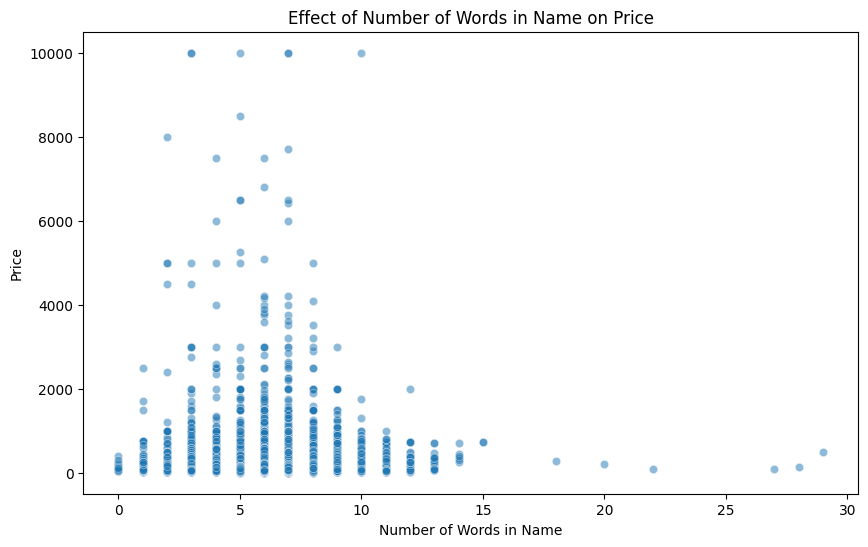

Not including word_count as a regressor due to weak correlation.


In [ ]:
# Add new feature: Number of words in the name column
df['word_count'] = df['name'].fillna('').apply(lambda x: len(x.split()))

# Analyze correlation of new feature with price
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation = numerical_df.corr()
print("Correlation of word_count with price:", correlation.loc['word_count', 'price'])

# Plot the effect of name_word_count on price
plt.figure(figsize=(10, 6))
sn.scatterplot(x='word_count', y='price', data=df, alpha=0.5)
plt.title("Effect of Number of Words in Name on Price")
plt.xlabel("Number of Words in Name")
plt.ylabel("Price")
plt.show()

# Decision on including the new feature
if abs(correlation.loc['word_count', 'price']) > 0.1:
    print("Including word_count as a regressor due to significant correlation.")
else:
    print("Not including word_count as a regressor due to weak correlation.")

---------

### 1.5 Exploring the correlation between price and features

---------


price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
word_count                        0.033482
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64


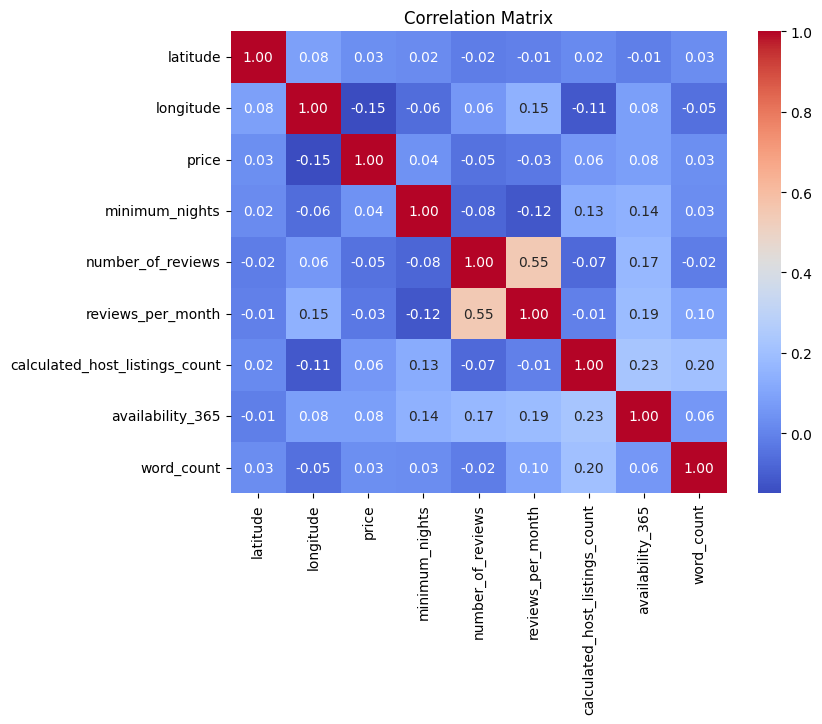

In [ ]:
# Correlation analysis
excluded_columns = ["id", "host_id", "name", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "last_review"]  # Exclude non-numerical columns
data_for_corr = df.drop(columns=excluded_columns)

correlation_matrix = data_for_corr.corr()
correlation = data_for_corr.corr()["price"].sort_values(ascending=False)
print(correlation)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix indicates that most features have weak correlations with price, with no correlation exceeding ±0.2. longitude shows a slightly negative correlation with price, while availability_365 and calculated_host_listings_count have minor positive correlations. 
- Overall, the matrix suggests that price is influenced by complex interactions rather than any single strong predictor.

---------

### 1.6 Price Distribution Visualization using Maps

---------


In [103]:
# Map visualization using Plotly
print("Creating map visualization using Plotly...")
pio.renderers.default = "notebook"  # For Jupyter
fig = px.scatter_mapbox(
    filtered_data,
    lat="latitude",
    lon="longitude",
    color="price",
    size=np.log1p(filtered_data["price"]),
    # color_continuous_scale="Viridis",
    size_max=5,
    zoom=11,
    mapbox_style="carto-positron",
    title="Airbnb Listings in NYC (Color-coded by Price)"
)
fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    title_font_size=18
)
fig.show()

Creating map visualization using Plotly...


- This map visualization shows the geographical distribution of Airbnb listings in NYC, with points color-coded by price. Higher-priced listings appear in brighter colors (yellow), while lower-priced listings are shown in darker shades (purple)
- Listings are clustered around Manhattan and Brooklyn, areas known for higher prices compared to other boroughs.

# 2. Data Preprocessing

---------

### 2.1 Removing unrelated features

---------

In [23]:
# Drop unrelated features
df = df.drop(columns=["id", "name", "host_name", "host_id"])

---------

### 2.2 Handling and imputing missing values

---------

In [24]:
# Handle missing values
df["reviews_per_month"].fillna(0, inplace=True)
df["last_review_year"] = pd.to_datetime(df["last_review"], errors='coerce').dt.year
df["last_review_year"].fillna(0, inplace=True)  # Fill missing years with 0
df = df.drop(columns=["last_review"])


In [25]:
# Check for missing values in the DataFrame
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
word_count                        0
last_review_year                  0
dtype: int64


In [26]:
df.dropna(inplace=True)

---------

### 2.3 Feature Engineering - Creating new features

---------

In [27]:
df['ef_minimum_cost'] = df['price'] * df['minimum_nights']
df['ef_availability_ratio'] = df['availability_365'] / 365
df['ef_daily_average_reviews'] = df['reviews_per_month'] / 30
df['ef_annual_income'] = df['price'] * df['availability_365']
df['ef_house_occupancy_rate'] = 365 - df['availability_365']


-------

**Encode categorical variables**
>

-------


In [28]:
# Encode categorical variables
label_encoders = {}
for column in ["neighbourhood_group", "neighbourhood", "room_type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [29]:
# Split features and target
X = df.drop(columns=["price"])
y = df["price"]

In [30]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---------

### 2.4 Splitting the data into training, validation, and test sets

---------



In [31]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# 3. Train Machine Learning Model

In [65]:
# Initialize a list to store evaluation metrics for each regressor
models = []
rmse_scores = []
r2_scores = []


---------

### 3.1 Neural Network

---------

In [ ]:
models.append("Neural Network")

# --- Neural Network Training and Evaluation ---
# Define the neural network
class PricePredictor(nn.Module):
    def __init__(self, input_dim):
        super(PricePredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),  # New hidden layer
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = PricePredictor(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
loss_record = {'loss_nn': [], 'val_loss_nn': []}
X_train_var = torch.tensor(X_train, dtype=torch.float32)
y_train_var = torch.tensor(y_train.values, dtype=torch.float32)
X_val_var = torch.tensor(X_val, dtype=torch.float32)
y_val_var = torch.tensor(y_val.values, dtype=torch.float32)

for epoch in range(5000):
    optimizer.zero_grad()

    # Forward pass for training and validation data
    y_pred_train = model(X_train_var).squeeze()
    y_pred_val = model(X_val_var).squeeze()

    # Calculate loss for training and validation data
    loss = criterion(y_pred_train, y_train_var)
    val_loss = criterion(y_pred_val, y_val_var)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Record the loss values
    loss_record["loss_nn"].append(loss.data.item())
    loss_record["val_loss_nn"].append(val_loss.data.item())
    print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
        

Test Loss: 1551.758235309435


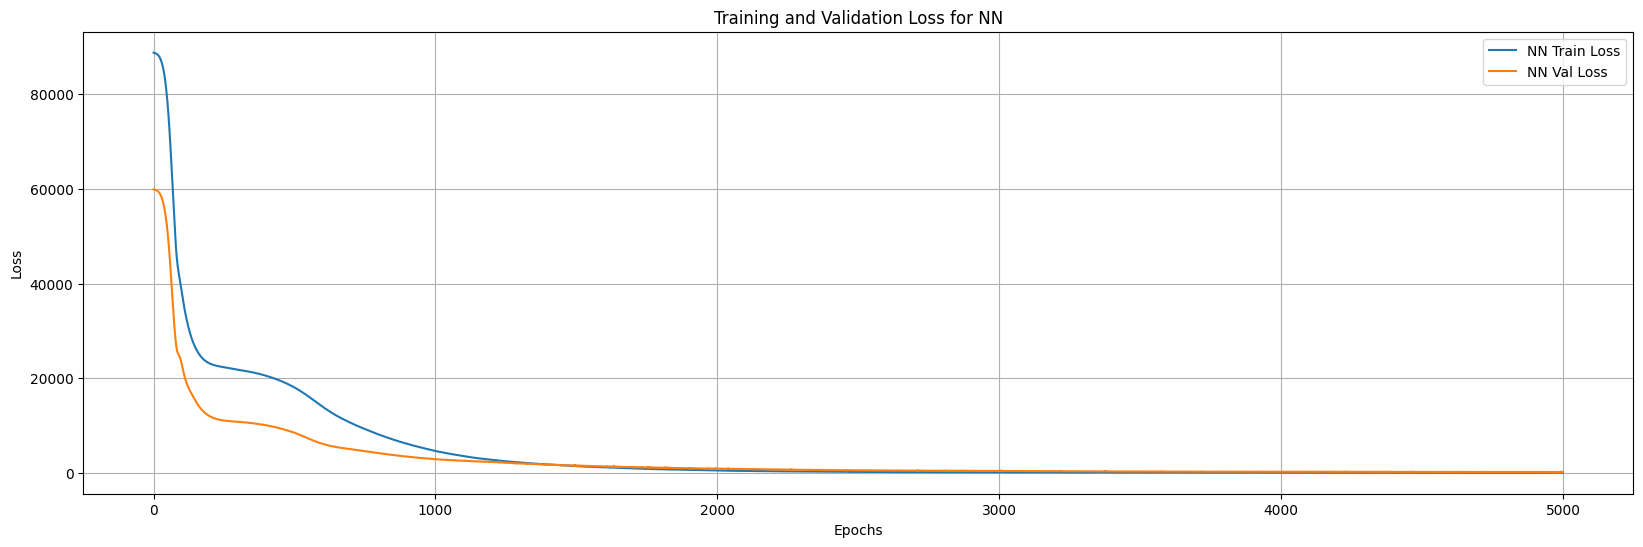

In [ ]:
# Evaluate on test data
model.eval()
test_loss = 0
y_pred, y_true = [], []

# Create test DataLoader
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features).squeeze()  # Squeeze output to match target size
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        y_pred.extend(outputs.tolist())
        y_true.extend(labels.tolist())

print(f"Test Loss: {test_loss/len(test_loader)}")


plt.figure(figsize=(20, 6))
plt.plot(loss_record['loss_nn'], label='NN Train Loss', linestyle='-')
plt.plot(loss_record['val_loss_nn'], label='NN Val Loss', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for NN')
plt.grid(True)
plt.show()

- The neural network loss plot shows rapid convergence as both training and validation losses decrease sharply at the beginning and stabilize over time. 
- The close alignment between the two curves indicates that the model is generalizing well without overfitting. 
- This suggests that the neural network effectively learned the data's patterns and is likely to perform robustly on unseen data.

In [66]:
y_true_np = np.array(y_true)

# Calculate RMSE for baseline model (average price)
baseline_pred = np.full_like(y_true_np, df["price"].mean())
baseline_rmse = mean_squared_error(y_true_np, baseline_pred, squared=False)
print(f"Baseline (Average Price): {baseline_pred[0]}")
print(f"Baseline (Average Price) RMSE: {baseline_rmse}")

print("")

# Calculate RMSE for model
y_pred_np = np.array(y_pred)
test_rmse_nn = mean_squared_error(y_true_np, y_pred_np, squared=False)
test_r2_nn = metrics.r2_score(y_true_np, y_pred_np)

print(f"Neural Net Test RMSE: {test_rmse_nn}")
print(f"Neural Net Test R2: {test_r2_nn}")

rmse_scores.append(test_rmse_nn)
r2_scores.append(test_r2_nn)



Baseline (Average Price): 152.7206871868289
Baseline (Average Price) RMSE: 207.37360629186867

Neural Net Test RMSE: 39.4541487042869
Neural Net Test R2: 0.9637962316490677


---------

### 3.2 Random Forest

---------

In [ ]:
models.append("Random Forest")

# ---  Random Forest Model Training and Evaluation ---
print("Training Random Forest Regressor...")

# Combine train and validation datasets for Random Forest
X_train_full = np.vstack((X_train, X_val))
y_train_full = np.hstack((y_train, y_val))

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=random_seed)
rf_model.fit(X_train_full, y_train_full)

Training Random Forest Regressor...


RandomForestRegressor(max_depth=20, random_state=42)

In [67]:
# Evaluate Random Forest on test sets
y_test_pred_rf = rf_model.predict(X_test)

# Calculate RMSE and R2 for test sets
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
tes_r2_rf = metrics.r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Test RMSE: {test_rmse_rf}")
print(f"Random Forest Test R2: {tes_r2_rf}")

rmse_scores.append(test_rmse_rf)
r2_scores.append(tes_r2_rf)

Random Forest Test RMSE: 57.91520307848767
Random Forest Test R2: 0.9219894050226785


---------

### 3.3 Linear Regression

---------

In [ ]:
models.append("Linear Regression")

print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train_full, y_train_full)

Training Linear Regression Model...


LinearRegression()

In [71]:
# Evaluate Linear Regression on test sets
y_test_pred_lr = lr_model.predict(X_test)

# Calculate RMSE and R2 for test sets
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)
tes_r2_lr = metrics.r2_score(y_test, y_test_pred_lr)

print(f"Linear Regression Test RMSE: {test_rmse_lr}")
print(f"Linear Regression Test R2: {tes_r2_lr}")

rmse_scores.append(test_rmse_lr)
r2_scores.append(tes_r2_lr)

Linear Regression Test RMSE: 150.73722934726476
Linear Regression Test R2: 0.4715432130091529


# 4. Model Evaluation

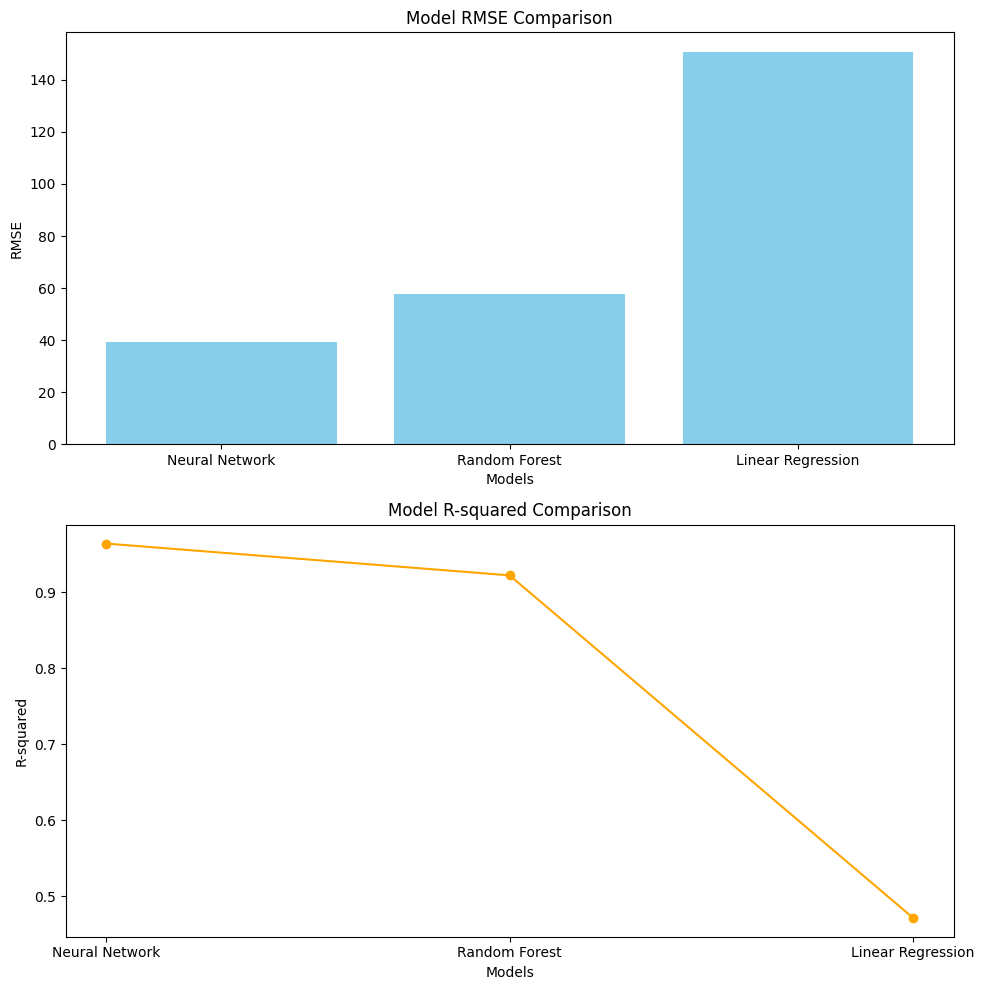

               Model        RMSE  R-squared
0     Neural Network   39.454149   0.963796
1      Random Forest   57.915203   0.921989
2  Linear Regression  150.737229   0.471543


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# RMSE Bar Chart
axs[0].bar(models, rmse_scores, color='skyblue')
axs[0].set_title('Model RMSE Comparison')
axs[0].set_ylabel('RMSE')
axs[0].set_xlabel('Models')

# R-squared Line Chart
axs[1].plot(models, r2_scores, color='orange', marker='o')
axs[1].set_title('Model R-squared Comparison')
axs[1].set_ylabel('R-squared')
axs[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

performance_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R-squared': r2_scores
})
print(performance_df)


The plot shows the performance comparison of three models—Neural Network, Random Forest, and Linear Regression—in terms of RMSE and R-squared. 
- The Neural Network outperforms the others with the lowest RMSE and highest R-squared, indicating predictive accuracy and fit to the data. 
- Random Forest shows moderate performance, while Linear Regression exhibits the highest RMSE and the lowest R-squared, making it the least effective model for this task.

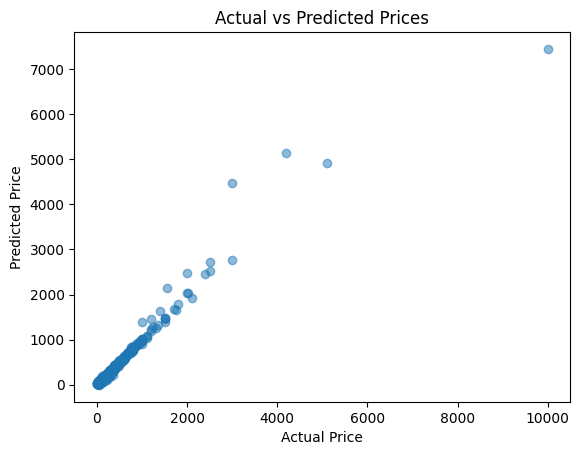

In [76]:
# Visualize results of MLP Model
plt.scatter(y_true, y_pred, alpha=0.5)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

The scatter plot shows the relationship between actual and predicted prices using MLP (Neural Net) Model. 
- The close alignment along the diagonal line suggests that the model generally predicts prices accurately, but deviations for higher prices indicate some overprediction or underprediction for outliers. 
- This highlights the model's strong overall performance but a potential limitation in handling extreme price values.

In [92]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

# Use GradientExplainer for feature importance
gradient_explainer = shap.GradientExplainer(model, X_train_tensor)
shap_values = gradient_explainer.shap_values(X_test_tensor)

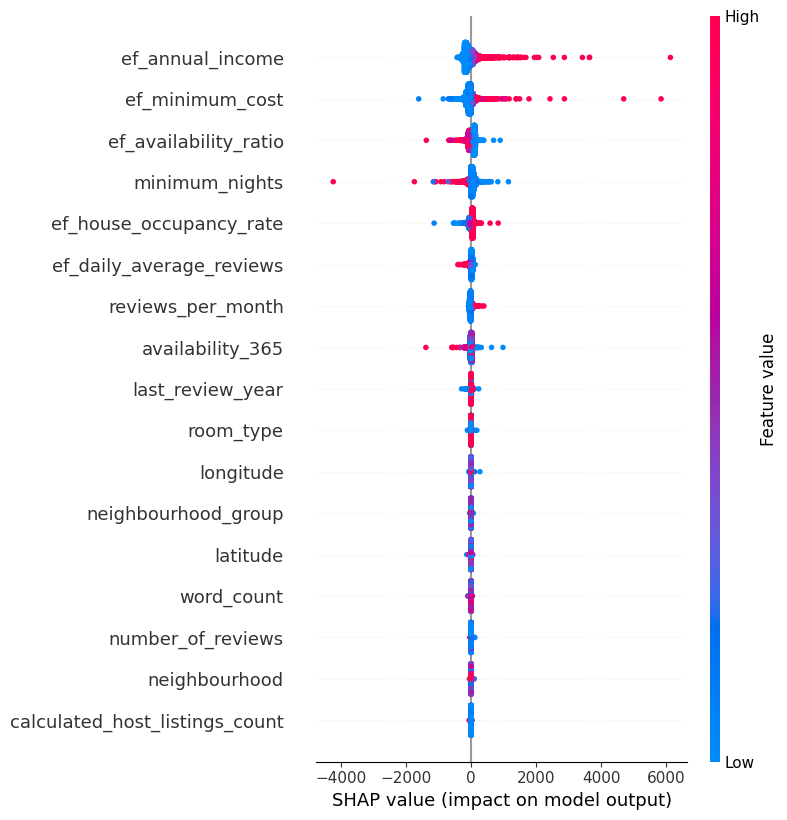

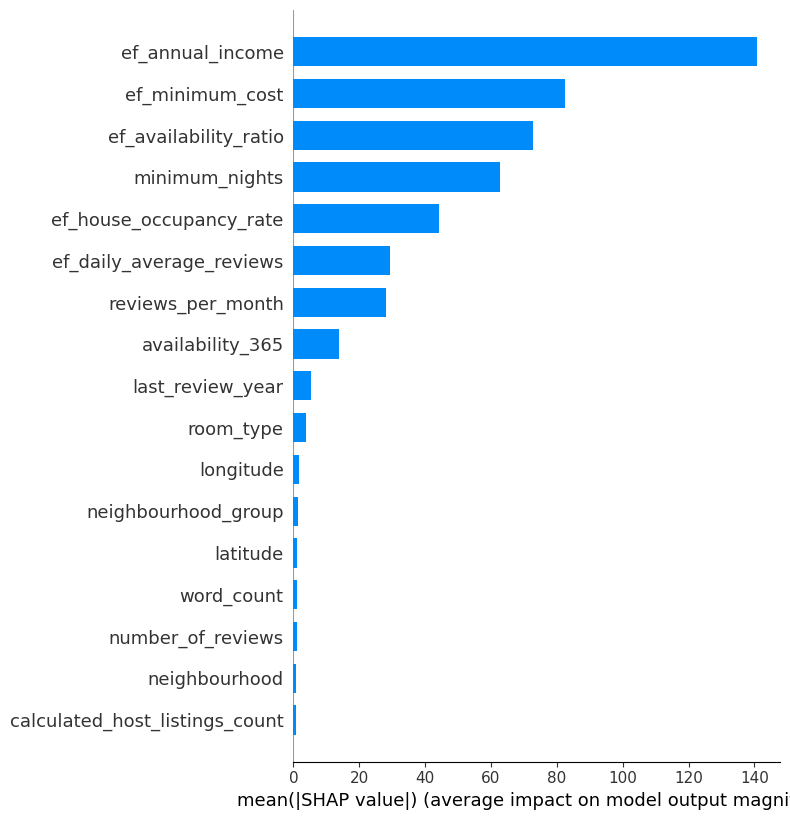

In [101]:
shap_values_reshaped = shap_values[:, :, 0]  # Remove the extra dimension

# Convert feature names to a list (based on the original data columns)
feature_names = list(df.drop(columns=['price']).columns)

# Visualize feature importance using SHAP summary plot
shap.summary_plot(shap_values_reshaped, X_test_tensor.numpy(), feature_names=feature_names)

# Bar plot for feature importance
shap.summary_plot(shap_values_reshaped, X_test_tensor.numpy(), feature_names=feature_names, plot_type="bar")

The SHAP summary plot highlights the key features contributing to the neural network's predictions for Airbnb price. 
- The top three influential features—**ef_annual_income, ef_minimum_cost, and ef_availability_ratio**—are engineered features, underlining the critical role of feature engineering in enhancing model performance. These features significantly impact the predicted price, with high SHAP values indicating a stronger effect on the model's output.



**Definition of Features:**
- ef_annual_income (price x availability_365): Estimated annual revenue from a listing based on price and availability.
- ef_minimum_cost (price x minimum_nights): Minimum cost required for booking, calculated as nightly price multiplied by minimum nights.
- ef_availability_ratio (availability_365 / 365): Proportion of days the property is available for booking in a year.
- minimum_nights: Minimum nights required for a booking.
- ef_house_occupancy_rate (365 - availability_365): Estimated occupancy rate based on reviews and availability.
- ef_daily_average_reviews (reviews_per_month / 30): Average number of reviews received per day.
- reviews_per_month: Monthly average of reviews received.
- availability_365: Total days a property is available for booking in a year.
- last_review_year: Year of the most recent review, reflecting listing activity.